# Credit Card Fraud Detection

In [1]:
COLAB = True

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
if COLAB:
    id_ = "1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F"
    aux = "'https://docs.google.com/uc?export=download&id={}&confirm=t'".format(id_)
    !wget $aux -O ./creditcard.csv.zip
    !unzip -qq ./creditcard.csv.zip

--2023-06-08 18:31:59--  https://docs.google.com/uc?export=download&id=1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F&confirm=t
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.100, 142.251.2.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egt3poq7qc6qks19qb9l02cvnm0p3m9v/1686249075000/03894129457800149408/*/1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F?e=download&uuid=0865c165-eae0-4487-a27c-b1893708864a [following]
--2023-06-08 18:32:00--  https://doc-0o-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egt3poq7qc6qks19qb9l02cvnm0p3m9v/1686249075000/03894129457800149408/*/1uSFC-iy_-_NkK-AEjoPMJI6ximN-jM5F?e=download&uuid=0865c165-eae0-4487-a27c-b1893708864a
Resolving doc-0o-0c-docs.googleusercontent.com (doc-0o-0c-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [4]:
# here the import csv file as a pandas dataframe
df = pd.read_csv("./creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset description**

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.
Due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("df dimensions: {} rows by {} columns".format(df.shape[0], df.shape[1]))

df dimensions: 284807 rows by 31 columns


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
y = df['Class'].values
y.shape

(284807,)

In [10]:
df['Time'].max() / 3600

47.99777777777778

In [11]:
# now we drop the target variable from the data set
#df.drop(['Class', 'Time', 'Amount'],axis=1,inplace=True)
df.drop(['Class', 'Time'],axis=1,inplace=True)
#df.drop('Class',axis=1,inplace=True)
df.shape

(284807, 29)

In [12]:
def show_counts(y):
    uns, counts = np.unique(y, return_counts=True)
    for u,c in zip(uns,counts):
        print("y={}: {} times".format(u,c))

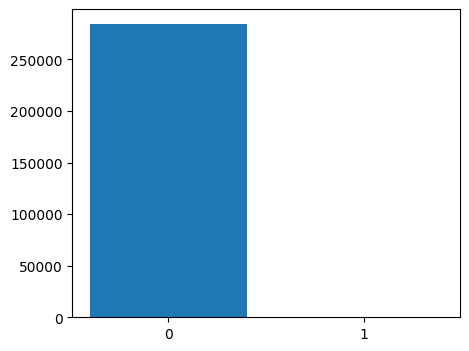

y=0: 284315 times
y=1: 492 times


In [13]:
#distribution of the target variable

plt.figure(figsize=(5,4))
uns,counts = np.unique(y, return_counts=True)
plt.bar(uns,counts)
plt.xticks([0,1])
plt.show()

show_counts(y)

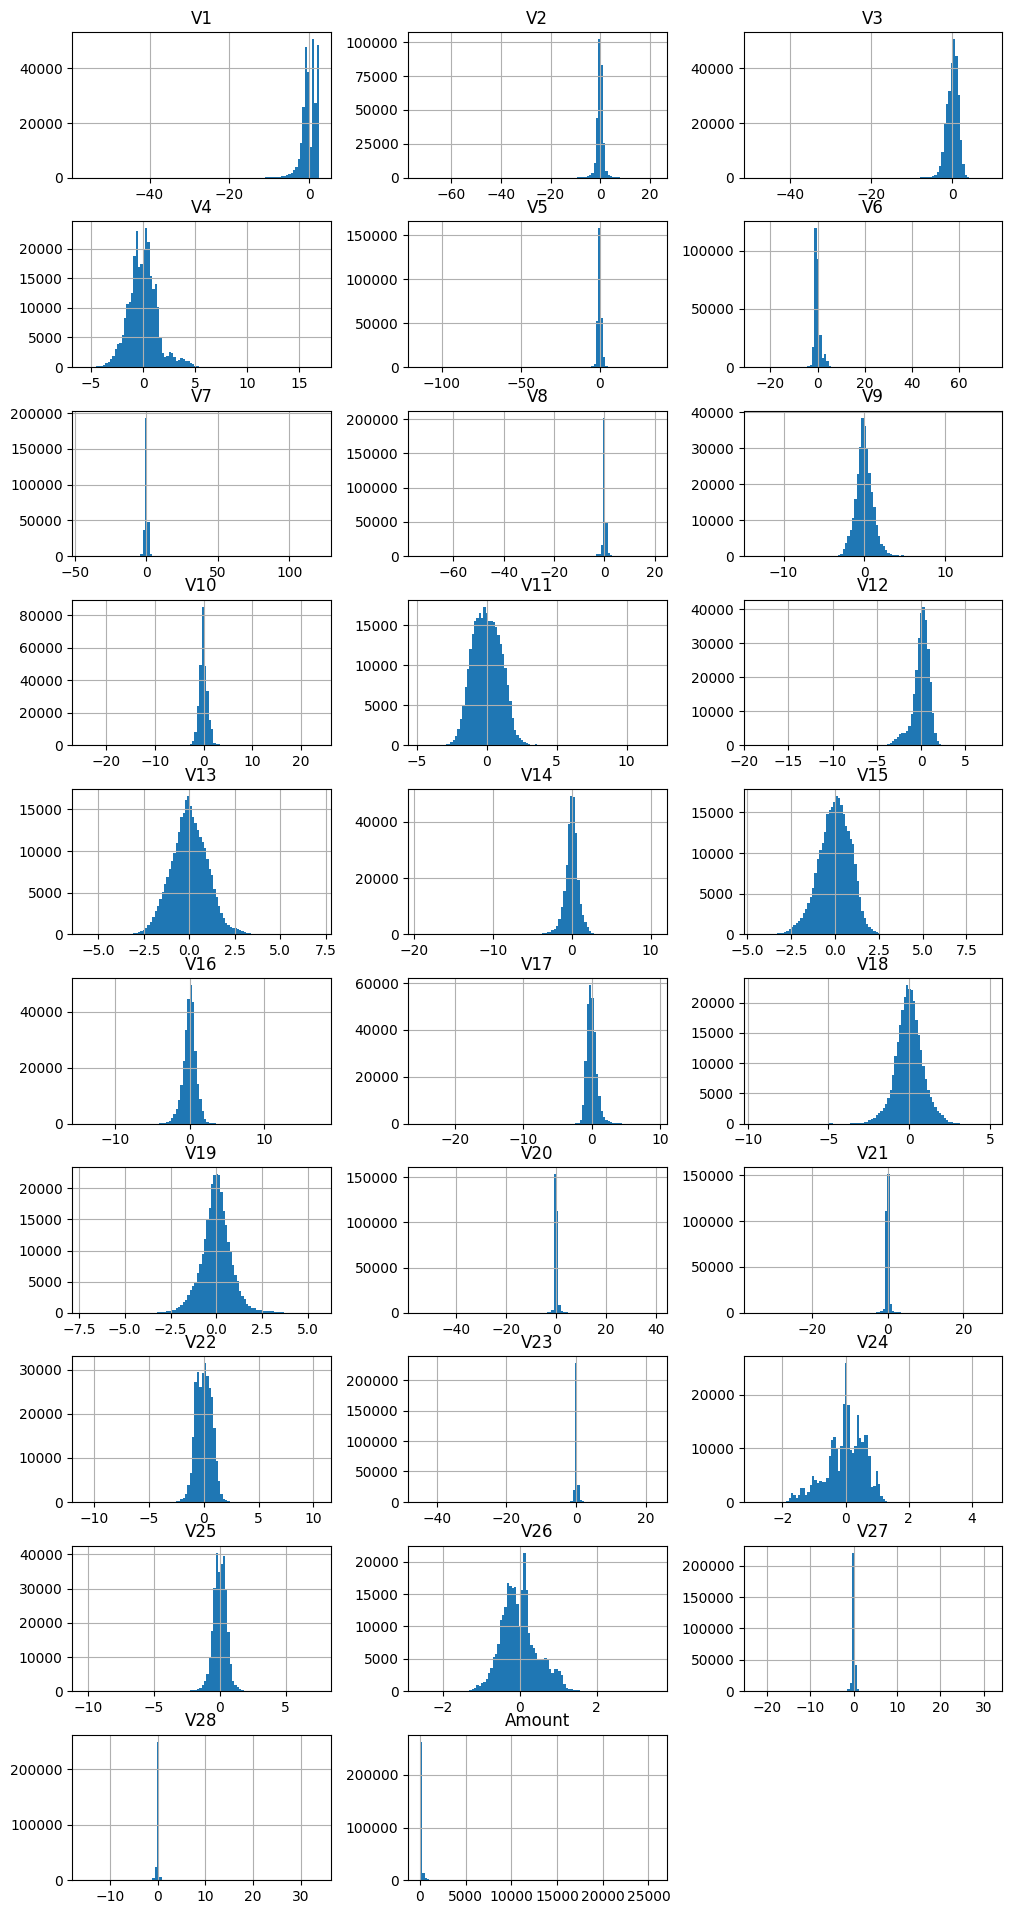

In [14]:
df.hist(figsize=(12,24), bins=100, layout=(-1,3));

In [15]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,...,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
show_counts(y[df.Amount >= 50])

In [16]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
attribute_names = list(df.columns)
print(attribute_names)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


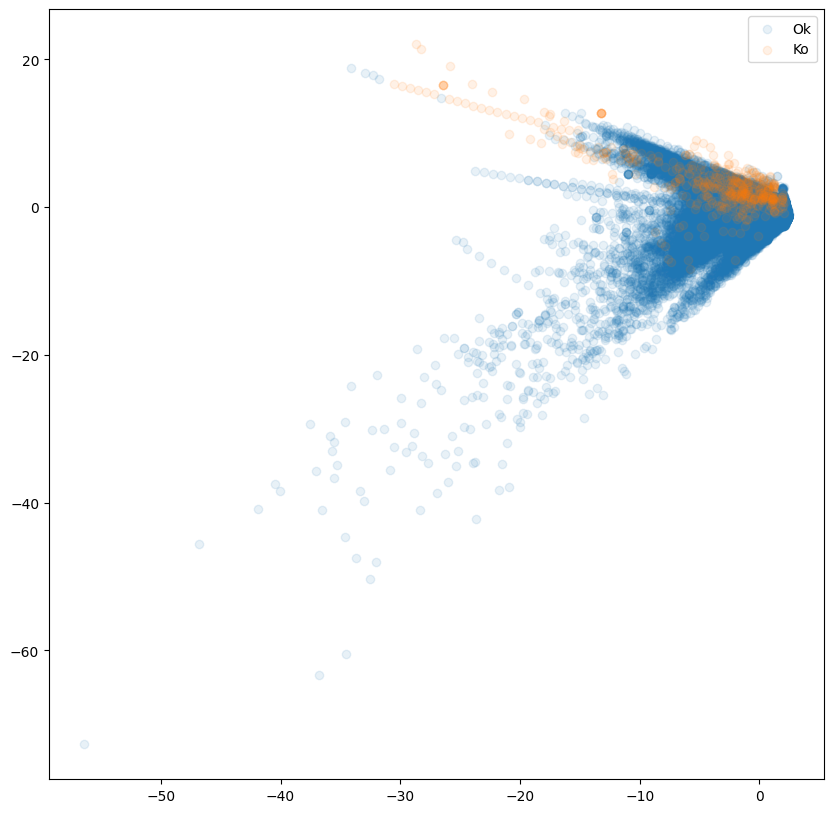

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(df[y==0]["V1"], df[y==0]["V2"], alpha=0.1, label="Ok")
plt.scatter(df[y==1]["V1"], df[y==1]["V2"], alpha=0.1, label="Ko")
plt.legend();

In [19]:
df["Amount"] = df["Amount"] / 125

In [20]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,...,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,0.706797
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.000961
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.044800
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.176000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.617320
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,205.529280


In [21]:
from sklearn.model_selection import train_test_split

df_tr, df_te, y_tr, y_te = train_test_split(df, y, test_size=0.3, random_state=2, stratify=y)

In [22]:
y_tr.mean(), y_te.mean()

(0.0017254870488152324, 0.0017321489179921118)

In [23]:
df_tr.shape

(199364, 29)

In [24]:
from tensorflow import keras

In [25]:
# defino mi red como una lista de capas:

model = keras.Sequential(
    [
     keras.Input(29),
     keras.layers.Dense(10, activation="relu"),
     keras.layers.Dense(2, activation="relu"),
     keras.layers.Dense(10, activation="relu"),
     keras.layers.Dense(29)
    ]
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 29)                319       
                                                                 
Total params: 671
Trainable params: 671
Non-trainable params: 0
_________________________________________________________________


In [27]:
# preparo conjunto de training y de validación
df_tr = df_tr[y_tr==0] # me quedo solo con los ejemplos ok
df_tr, df_val = train_test_split(df_tr, test_size=0.3, random_state=1) # el 30% lo llevo a validación

In [28]:
df_tr.shape, df_val.shape

((139314, 29), (59706, 29))

In [29]:
model.compile(optimizer='rmsprop', loss="mse")

In [30]:
from matplotlib.ticker import MaxNLocator

def plot_history(historia):
    f = plt.figure(figsize=(4,4))
    h = historia.history
    aux = range(1,len(h["loss"])+1)
    mejor_epoca = np.argmin(h["val_loss"])
    plt.plot(aux, h["loss"], label="entrenamiento")
    plt.plot(aux, h["val_loss"], label="validación")
    plt.plot(mejor_epoca+1, h["val_loss"][mejor_epoca], 'or')
    plt.title('Loss', fontsize=18)
    plt.xlabel('Época', fontsize=18)
    plt.xticks(fontsize=12); plt.yticks(fontsize=12)
    plt.legend()
    f.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [31]:
lista_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="best_model.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]

In [32]:
historia = model.fit(df_tr, df_tr, batch_size=128, epochs=50, callbacks=lista_callbacks,
                     validation_data=(df_val, df_val))

Epoch 1/50
1089/1089 [==============================] - 5s 4ms/step - loss: 0.8971 - val_loss: 0.7835
Epoch 2/50
1089/1089 [==============================] - 3s 3ms/step - loss: 0.7529 - val_loss: 0.7115
Epoch 3/50
1089/1089 [==============================] - 3s 2ms/step - loss: 0.7144 - val_loss: 0.6886
Epoch 4/50
1089/1089 [==============================] - 3s 2ms/step - loss: 0.6987 - val_loss: 0.6807
Epoch 5/50
1089/1089 [==============================] - 2s 2ms/step - loss: 0.6921 - val_loss: 0.6736
Epoch 6/50
1089/1089 [==============================] - 4s 3ms/step - loss: 0.6878 - val_loss: 0.6720
Epoch 7/50
1089/1089 [==============================] - 3s 3ms/step - loss: 0.6846 - val_loss: 0.6687
Epoch 8/50
1089/1089 [==============================] - 3s 2ms/step - loss: 0.6825 - val_loss: 0.6674
Epoch 9/50
1089/1089 [==============================] - 2s 2ms/step - loss: 0.6813 - val_loss: 0.6647
Epoch 10/50
1089/1089 [==============================] - 3s 3ms/step - loss: 0.679

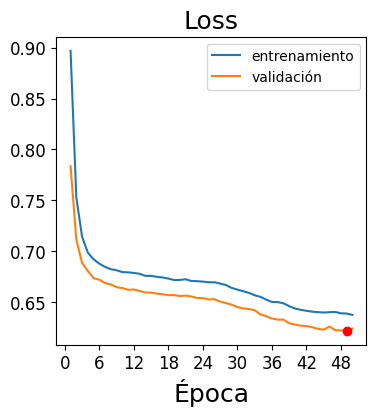

In [33]:
plot_history(historia)

In [34]:
# cargo best_model de fichero, que es el punto rojo (donde mejor métrica en validación)
model = keras.models.load_model("best_model.keras")

In [35]:
df_te[:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
112855,-1.142801,1.409180,-0.646741,-1.254767,2.420123,3.376525,-0.204954,0.135930,0.019185,0.357833,...,0.273384,0.391299,-1.307445,0.115663,0.913466,0.111612,0.092952,0.369318,0.217595,0.01432
262809,-1.088132,0.744172,0.761392,-0.861099,0.905130,-0.386599,1.162297,-0.066910,-0.211388,-0.639000,...,0.040266,-0.319960,-0.900011,-0.310377,0.469027,0.699531,0.390946,0.075354,0.110781,0.46752
106017,-9.156731,-1.036810,-4.665348,4.390102,-6.271095,2.299906,0.001721,3.595945,-2.478871,-0.943510,...,-1.961031,0.012017,-0.756726,-2.000589,-0.027954,-1.011416,-0.178245,-1.274012,-1.466693,3.94328


In [36]:
errores_totales = ((df_te.values - model.predict(df_te))**2).mean(axis=1)
errores_totales.shape

2671/2671 [==============================] - 5s 2ms/step


(85443,)

In [37]:
df_te.shape

(85443, 29)

In [38]:
inds = np.argsort(errores_totales)[::-1] # saco los índices de los errores de mayor a menor magnitud

In [39]:
np.argsort([5,4,3])[::-1]

array([0, 1, 2])

In [40]:
y_te[inds[:20]]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [47]:
errores_totales[:100]

array([0.60071433, 0.24169443, 4.97879752, 0.19497831, 0.52261774,
       0.12664621, 0.80345325, 0.34009118, 0.67834294, 0.45129035,
       0.26211571, 0.26910167, 1.31010805, 0.51981931, 0.17103991,
       0.27406571, 0.80609955, 0.25856832, 0.9703817 , 0.26617171,
       1.25616053, 1.02192303, 0.37692916, 0.9879229 , 0.44582645,
       1.19627646, 1.51115467, 0.81668201, 0.20623478, 1.28332331,
       0.73049038, 0.44053251, 0.32717398, 0.52874504, 0.24769054,
       0.33993838, 1.02122235, 1.42462846, 0.1936952 , 0.78534716,
       0.32451811, 1.45824275, 1.21234473, 0.51300942, 0.45467536,
       0.21182378, 1.43451863, 0.94056583, 0.34690224, 0.6551915 ,
       0.43600732, 0.27267062, 0.69715235, 0.44800934, 0.12637184,
       0.49519842, 0.25137135, 0.69228182, 0.19940025, 0.26255086,
       0.22766197, 0.47447796, 1.08084985, 0.58674734, 0.33712229,
       0.2736513 , 0.15578785, 0.65903662, 0.36989758, 0.61129475,
       0.20463262, 0.71616195, 0.68816745, 0.84273029, 0.16747

In [56]:
y_te[-401:-375]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0])

In [57]:
errores_totales[-401:-375]

array([ 9.4123714 ,  0.57811213,  0.97114417,  0.1623593 ,  0.97982512,
        0.15161464,  0.19690211,  1.70975151,  0.51734744,  0.69229102,
        0.30734642,  0.29852863,  1.0509716 ,  0.24911206,  0.24447317,
        0.72893614,  0.24162111,  0.28249714,  0.30511107,  0.35622281,
        0.85263252,  0.11980291,  2.58032295, 61.61062912,  0.42314243,
        0.77645357])

In [62]:
tabla_test = pd.DataFrame({"clase_real":y_te, "error_autoencoder":errores_totales})
tabla_test.sort_values("error_autoencoder", ascending=False)[:20]

,clase_real,error_autoencoder
49313,1,181.171953
46402,0,147.107897
20582,1,142.978393
84304,1,130.293760
72754,1,130.293760
77734,1,114.408243
23383,1,112.998480
7432,1,112.998480
80444,1,86.498932
69554,1,79.870223


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
fpt, tpr, thresholds = roc_curve(y_true=y_te, y_score=errores_totales, pos_label=1)

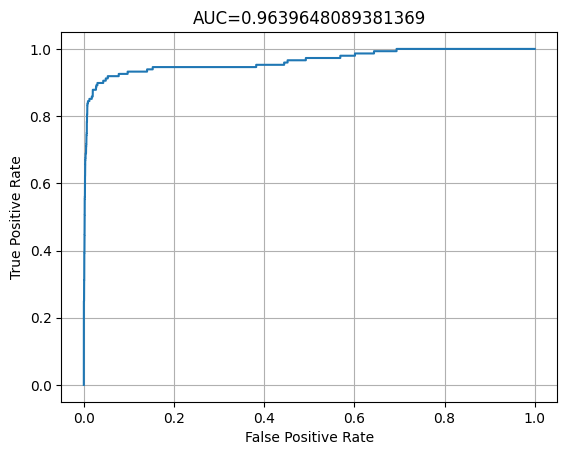

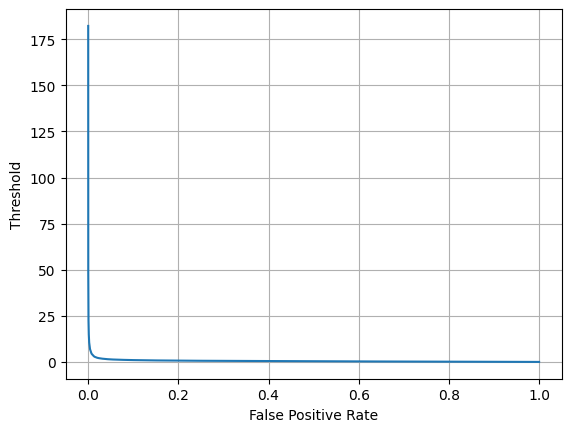

In [42]:
plt.plot(fpt, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC={}".format(roc_auc_score(y_true=y_te, y_score=errores_totales)))
plt.grid()
#plt.xlim([0.01,0.1])
plt.show()
plt.plot(fpt, thresholds)
plt.xlabel("False Positive Rate")
plt.ylabel("Threshold")
#plt.xlim([0.01,0.1])
#plt.ylim([0,10])
plt.grid();

In [63]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_te, errores_totales, pos_label=1)

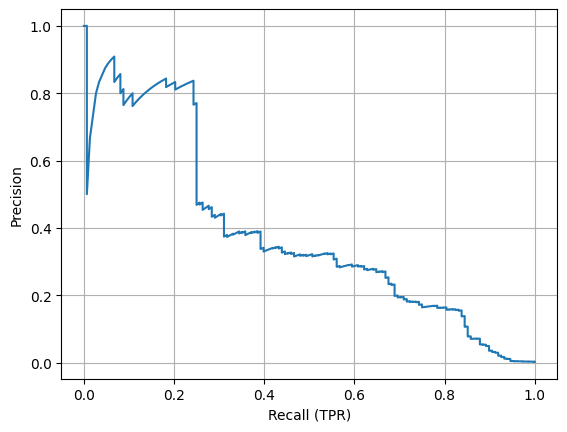

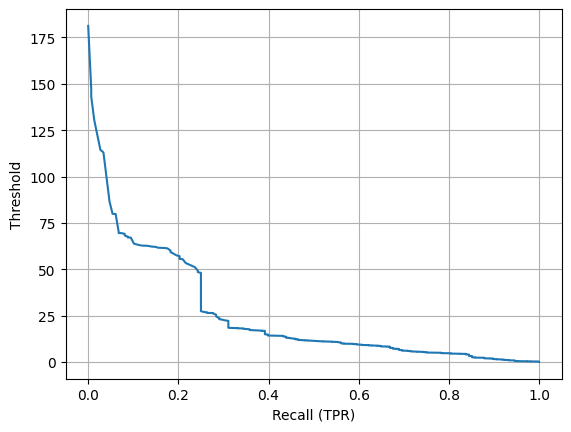

In [64]:
plt.plot(recall, precision)
plt.xlabel("Recall (TPR)")
plt.ylabel("Precision")
plt.grid()
#plt.xlim([0.01,0.1])
plt.show()
plt.plot(recall[1:], thresholds)
plt.xlabel("Recall (TPR)")
plt.ylabel("Threshold")
#plt.xlim([0.01,0.1])
#plt.ylim([0,10])
plt.grid();